In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import files


In [3]:
uploaded = files.upload()

Saving air_pollution_data.csv to air_pollution_data.csv


In [4]:
df = pd.read_csv('air_pollution_data.csv')


In [5]:
df.head()

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53


In [6]:
df.drop_duplicates(inplace=True)

# Identify numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

# Impute missing numeric values with median
imputer = SimpleImputer(strategy='median')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Combine with non-numeric columns
df_final = pd.concat([df[non_numeric_cols].reset_index(drop=True), df_numeric_imputed], axis=1)


In [7]:
df.describe()


,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,23504.000000,23504.000000,23504.00000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000,23504.000000
mean,3.920354,1113.224543,6.00554,25.044104,35.059777,15.971449,98.598310,121.848091,12.060212
std,1.415490,1401.770372,24.50272,25.839242,31.901760,23.943464,135.572391,160.429589,17.544759
min,1.000000,173.570000,0.00000,0.310000,0.000000,0.190000,0.500000,0.580000,0.000000
25%,3.000000,447.270000,0.00000,8.740000,7.870000,4.470000,24.677500,32.277500,2.340000
50%,5.000000,700.950000,0.00000,16.450000,28.250000,7.990000,58.860000,75.775000,6.520000
75%,5.000000,1188.280000,0.27000,32.220000,54.360000,16.450000,117.605000,147.642500,15.830000
max,5.000000,23071.290000,457.76000,331.760000,406.270000,442.510000,2203.550000,2429.130000,352.620000


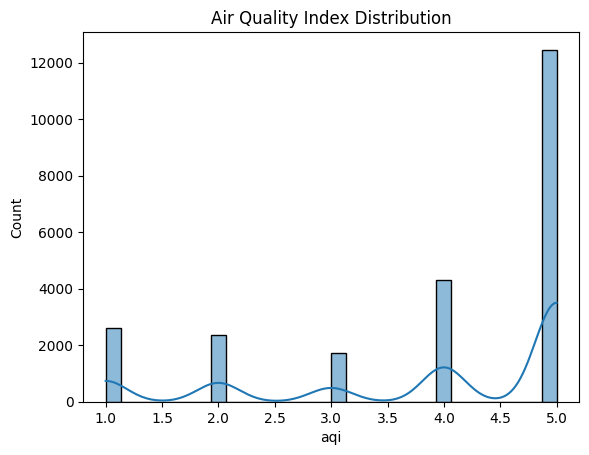

In [8]:

sns.histplot(df['aqi'], bins=30, kde=True)
plt.title('Air Quality Index Distribution')
plt.show()


 Correlation Matrix:
            aqi        co        no       no2        o3       so2     pm2_5  \
aqi    1.000000  0.377355  0.173879  0.440113  0.085184  0.303629  0.456002   
co     0.377355  1.000000  0.843799  0.805820 -0.313232  0.631510  0.929881   
no     0.173879  0.843799  1.000000  0.499226 -0.267879  0.532777  0.719160   
no2    0.440113  0.805820  0.499226  1.000000 -0.380578  0.708760  0.737977   
o3     0.085184 -0.313232 -0.267879 -0.380578  1.000000 -0.163729 -0.191523   
so2    0.303629  0.631510  0.532777  0.708760 -0.163729  1.000000  0.552935   
pm2_5  0.456002  0.929881  0.719160  0.737977 -0.191523  0.552935  1.000000   
pm10   0.467122  0.935345  0.718655  0.755135 -0.203824  0.562396  0.990648   
nh3    0.361675  0.603286  0.416600  0.608555 -0.192751  0.468437  0.558785   

           pm10       nh3  
aqi    0.467122  0.361675  
co     0.935345  0.603286  
no     0.718655  0.416600  
no2    0.755135  0.608555  
o3    -0.203824 -0.192751  
so2    0.562396  0.4

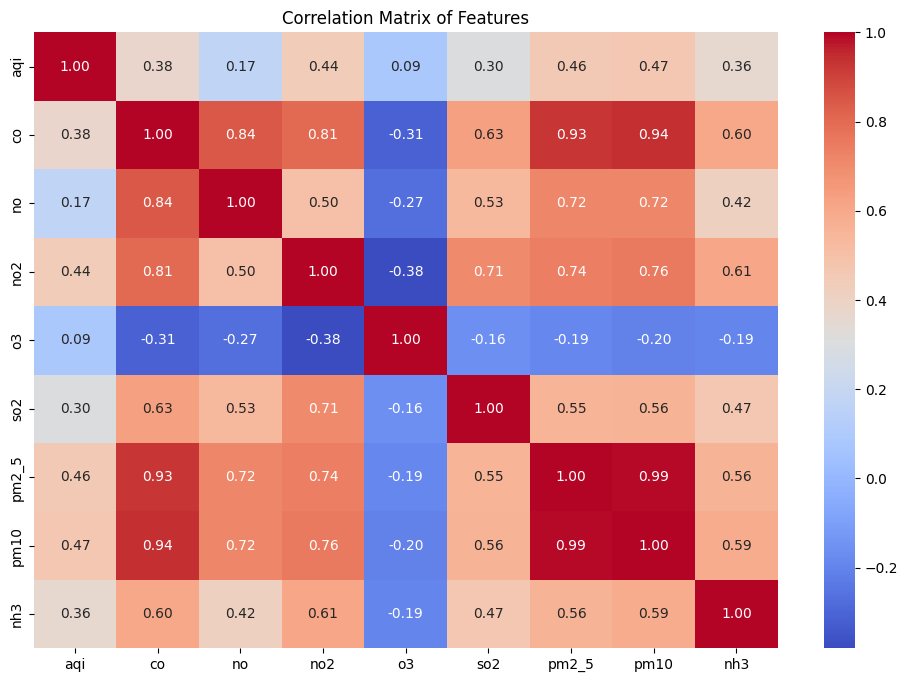

In [9]:
# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()  # Select only numeric columns for correlation

# Display the correlation matrix
print(" Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

Text(0, 0.5, 'Frequency')

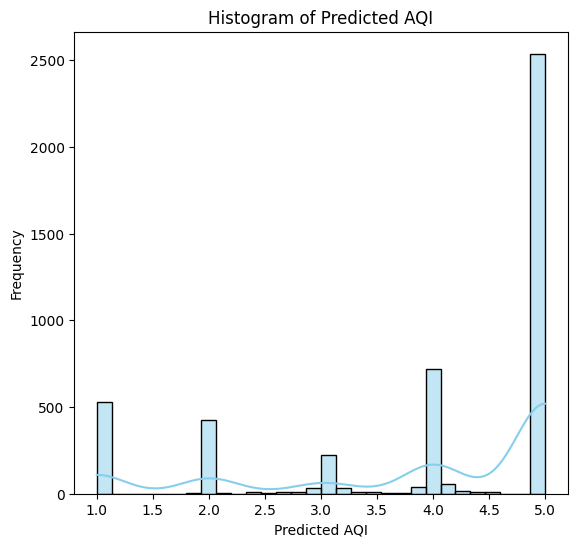

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day
    df.drop(columns='Date', inplace=True)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns

imputer = SimpleImputer(strategy='median')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

df_final = pd.concat([df[non_numeric_cols].reset_index(drop=True), df_numeric_imputed], axis=1)

df_encoded = pd.get_dummies(df_final, drop_first=True)
X = df_encoded.drop('aqi', axis=1)
y = df_encoded['aqi']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Plot: Histogram of predicted AQI
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(y_pred, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Predicted AQI")
plt.xlabel("Predicted AQI")
plt.ylabel("Frequency")


 Model Evaluation on Test Set:
Mean Absolute Error (MAE): 0.02
Root Mean Squared Error (RMSE): 0.09
R² Score: 0.9955


<ipython-input-12-8b938acc1555>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type', y='AQI', data=df_melted, palette='pastel')


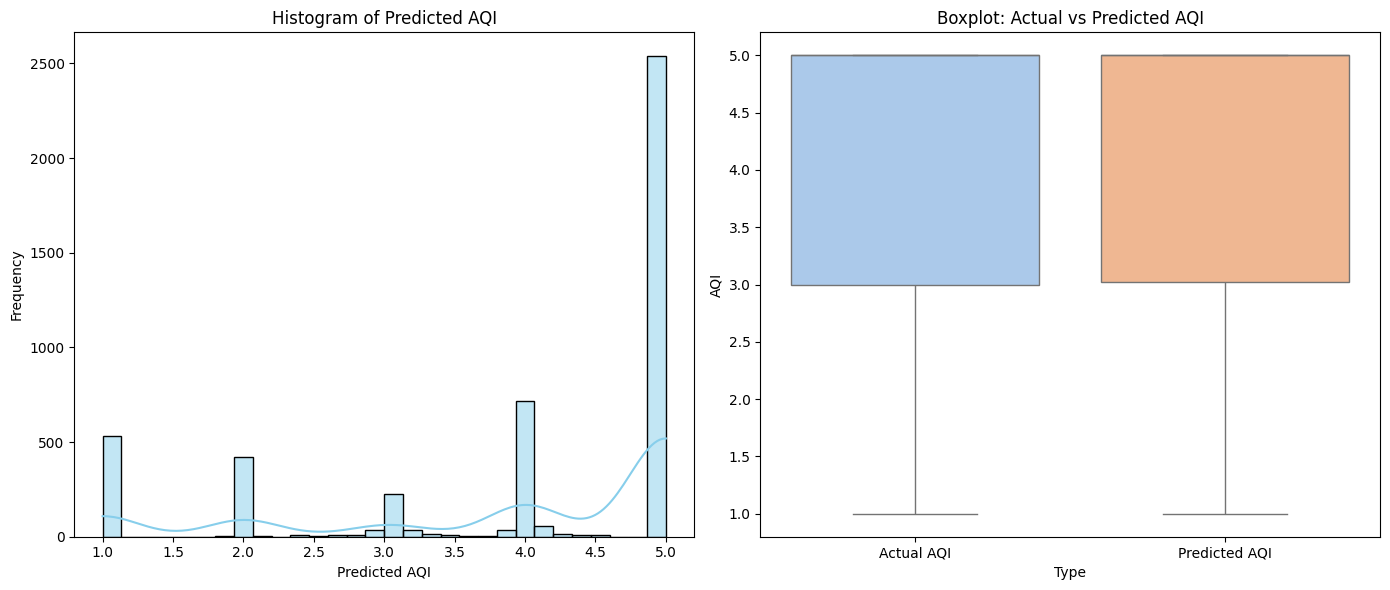

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)

# RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
rmse = np.sqrt(mse)  # Take the square root to get RMSE

# R² Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(" Model Evaluation on Test Set:")
print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))

# --------------------------
# Plotting Results
# --------------------------

# Plot: Histogram of predicted AQI
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(y_pred, bins=30, kde=True, color='skyblue')
plt.title("Histogram of Predicted AQI")
plt.xlabel("Predicted AQI")
plt.ylabel("Frequency")

# Boxplot (Actual vs Predicted AQI)
plt.subplot(1, 2, 2)
df_compare = pd.DataFrame({'Actual AQI': y_test, 'Predicted AQI': y_pred})
df_melted = df_compare.melt(var_name='Type', value_name='AQI')
sns.boxplot(x='Type', y='AQI', data=df_melted, palette='pastel')
plt.title("Boxplot: Actual vs Predicted AQI")

# Show plots
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Define AQI categories based on standard AQI breakpoints
def categorize_aqi(aqi):
    if aqi == 5:
        return "Good"
    elif aqi == 4:
        return "Moderate"
    elif aqi == 3:
        return "Unhealthy for Sensitive"
    elif aqi == 2:
        return "Unhealthy"
    elif aqi == 1:
        return "Very Unhealthy"
    else:
        return "Hazardous"

# Convert actual and predicted AQI values into categories
y_test_cat = y_test.apply(categorize_aqi)
y_pred_cat = pd.Series(y_pred).apply(categorize_aqi)

# Accuracy
accuracy = accuracy_score(y_test_cat, y_pred_cat)
print(f"Accuracy: {accuracy:.4f}")

# Classification Report (includes macro avg and weighted avg)
report = classification_report(y_test_cat, y_pred_cat, digits=4)
print("Classification Report:\n")
print(report)


Accuracy: 0.8466
Classification Report:

                         precision    recall  f1-score   support

                   Good     1.0000    0.9393    0.9687      2537
              Hazardous     0.0000    0.0000    0.0000         0
               Moderate     0.9962    0.6226    0.7663       848
              Unhealthy     0.9952    0.9123    0.9519       456
Unhealthy for Sensitive     0.9538    0.3769    0.5403       329
         Very Unhealthy     0.9981    0.9962    0.9972       531

               accuracy                         0.8466      4701
              macro avg     0.8239    0.6412    0.7041      4701
           weighted avg     0.9954    0.8466    0.9038      4701



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.7 MB/s eta 0:00:00


In [22]:
from math import floor
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Dummy predict function (replace with your model)
def predict_aqi_ui(CO, NO, NO2, PM25, PM10, SO2, O3, NH3):
    # Input features as an array
    features = np.array([CO, NO, NO2, PM25, PM10, SO2, O3, NH3])

    # Dummy prediction (replace with model.predict(features.reshape(1, -1)) etc.)
    predicted_aqi = float(50 + 2 * CO + 1.5 * NO2 + 0.8 * PM25 + 0.5 * O3)

    # Ensure predicted AQI is between 1 and 5
    predicted_aqi = max(1, min(predicted_aqi, 5))

    # Dummy true values (for visualization and metric examples)
    true_values = np.random.normal(predicted_aqi, 10, size=50)
    predictions = true_values + np.random.normal(0, 5, size=50)

    # Evaluation metrics
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    r2 = r2_score(true_values, predictions)


    return (
        round(predicted_aqi, 2),
        f"{mae:.2f}",
        f"{rmse:.2f}",
        f"{r2:.2f}"

    )

# Gradio interface
interface = gr.Interface(
    fn=predict_aqi_ui,
    inputs=[
        gr.Slider(0.1, 10.0, value=1.0, label="CO"),
        gr.Slider(0.1, 100.0, value=10.0, label="NO"),
        gr.Slider(0.1, 200.0, value=20.0, label="NO₂"),
        gr.Slider(0.1, 500.0, value=40.0, label="PM2.5"),
        gr.Slider(0.1, 500.0, value=60.0, label="PM10"),
        gr.Slider(0.1, 100.0, value=10.0, label="SO₂"),
        gr.Slider(0.1, 150.0, value=20.0, label="O₃"),
        gr.Slider(0.1, 100.0, value=10.0, label="NH₃"),
    ],
    outputs=[
        gr.Textbox(label="Predicted AQI"),
        gr.Textbox(label="Mean Absolute Error (MAE)"),
        gr.Textbox(label="Root Mean Squared Error (RMSE)"),
        gr.Textbox(label="R² Score"),

    ],
    title="🌫️ AQI Prediction and Evaluation",
    description="Enter pollutant levels to predict AQI and evaluate model performance (MAE, RMSE, R²) with visualizations."
)

# Launch the interface
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a26c1f92e18a13329.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
